Diplaying select neurons of os66 discrimination experiment

Prereqs: having these files in the correct folder:
 - sigfn
 - neu_qual
 - behav
 - frame_timing

In [1]:
# Import all the required libraries
import math
import numpy as np
# import csv - maybe not needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit


In [2]:
# Specify all the paths and file names
mouse_id = 66
exp_type = 'discr'
# For rysen
path = 'd:/CaIm/' + exp_type + '/os' + str(mouse_id) + '/'
# For Dell
# path = 'c:/BG/data/os/CaIm/' + exp_type + '/os' + str(mouse_id) + '/'
name_caim = 'os' + str(mouse_id) + '_' + exp_type + '_sigfn.csv'
name_neu_qual = 'os' + str(mouse_id) + '_' + exp_type + '_neu_qual.csv'
name_behav = 'os' + str(mouse_id) + '_' + exp_type + '_behav.csv'
name_frame_timing = 'os' + str(mouse_id) + '_' + exp_type + '_frame_timing.csv'


In [3]:
# Load all the csv files
# Load the CSV file
caim = pd.read_csv(path + name_caim, header=None)
neu_qual = pd.read_csv(path + name_neu_qual, header=None)
behav = pd.read_csv(path + name_behav)
frame_timing = pd.read_csv(path + name_frame_timing)

to change: frames_before, frames_after --> frame_range

In [4]:
'''
select neurons of a certain quality for the analysis, with:
0 being non-neurons
1 terrible neurons
2 normal neurons
3 great neurons
'''
select_neu = np.where(neu_qual[0] >= 2)[0]
select_neu = select_neu
len(select_neu)

122

In [5]:
# make dff
n_neu = caim.shape[1]
for neu in np.arange(n_neu):
    baseline = np.mean(caim[neu])
    caim[neu] = (caim[neu] - baseline) / baseline

In [6]:
'''
Function for taking event times starting points in ms, CaIm data, 
timing data for caim, selected neurons, value for how many frames 
before and after, and returning segments around these events
''' 
def cut_segments(t_stims, caim, caim_timing, select_neu,
                frame_before, frame_after):
    
    # trim the t_stims
    last_frame_t = frame_timing['real_ts'].iloc[-1]
    t_stims = t_stims[ t_stims < last_frame_t - frame_after]
    t_stims = t_stims[ t_stims > frame_before + 1]
    
    # prepare the vessel for the segments
    ### FUCK PREALLOCATION
    segments = np.zeros([len(t_stims), len(select_neu), frame_before + frame_after])
    print(segments.shape)

    for n in np.arange(0,len(t_stims)):
        t_stim = t_stims.iloc[n]
        # find the frame closest to the t_stim based on timing from caim_timing
        start_frame = caim_timing['real_ts'].sub(t_stim).abs().idxmin()
        
       
            
        # Get segments after the start_frame from select neurons
        for neu_n in np.arange(len(select_neu)):
           # print(caim[neu][start_frame - frame_before : start_frame + frame_after])
            #print(segments[n, neu, :])
            segm = caim[select_neu[neu_n]][start_frame - frame_before : start_frame + frame_after]
            if len(segm) >= frame_before + frame_after:
                segments[n, neu_n, :] = segm
            
    return segments


In [27]:
select_neu = [10, 11, 19, 22, 42, 48, 54, 70, 75, 81, 83, 99, 123, 152]
len(select_neu)

14

In [30]:
# Specify how many frames after each event to select
frames_before = 20
frames_after = 40


# Prep all the segments for plotting
# side L, laser NO
sL_l0_rows = behav[(behav['side'] == 1) & (behav['laser'] == 0)]
sL_l0_segm = cut_segments(sL_l0_rows['tone_ts'], caim, frame_timing, select_neu, frames_before, frames_after)

# side L, laser L
sL_lL_rows = behav[(behav['side'] == 1) & (behav['laser'] == 1)]
sL_lL_segm = cut_segments(sL_lL_rows['tone_ts'], caim, frame_timing, select_neu, frames_before, frames_after)

# side L, laser R
sL_lR_rows = behav[(behav['side'] == 1) & (behav['laser'] == 2)]
sL_lR_segm = cut_segments(sL_lR_rows['tone_ts'], caim, frame_timing, select_neu, frames_before, frames_after)


# Prep all the segments for plotting
# side R, laser NO
sR_l0_rows = behav[(behav['side'] == -1) & (behav['laser'] == 0)]
sR_l0_segm = cut_segments(sR_l0_rows['tone_ts'], caim, frame_timing, select_neu, frames_before, frames_after)

# side L, laser L
sR_lL_rows = behav[(behav['side'] == -1) & (behav['laser'] == 1)]
sR_lL_segm = cut_segments(sR_lL_rows['tone_ts'], caim, frame_timing, select_neu, frames_before, frames_after)

# side L, laser R
sR_lR_rows = behav[(behav['side'] == -1) & (behav['laser'] == 2)]
sR_lR_segm = cut_segments(sR_lR_rows['tone_ts'], caim, frame_timing, select_neu, frames_before, frames_after)

(59, 14, 60)
(22, 14, 60)
(20, 14, 60)
(53, 14, 60)
(24, 14, 60)
(18, 14, 60)


# only select neurons

<Figure size 640x480 with 0 Axes>

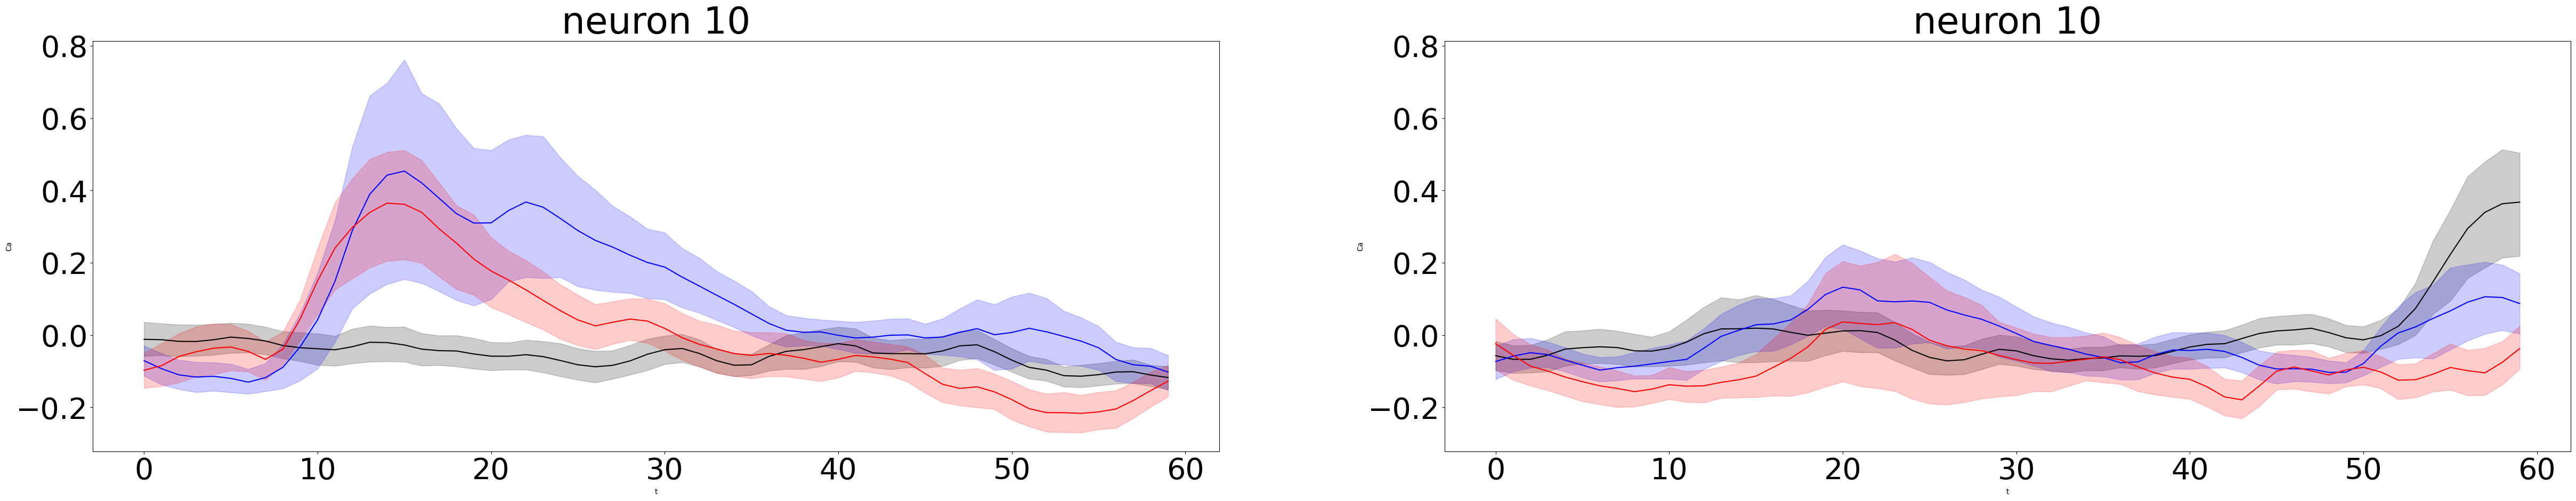

<Figure size 640x480 with 0 Axes>

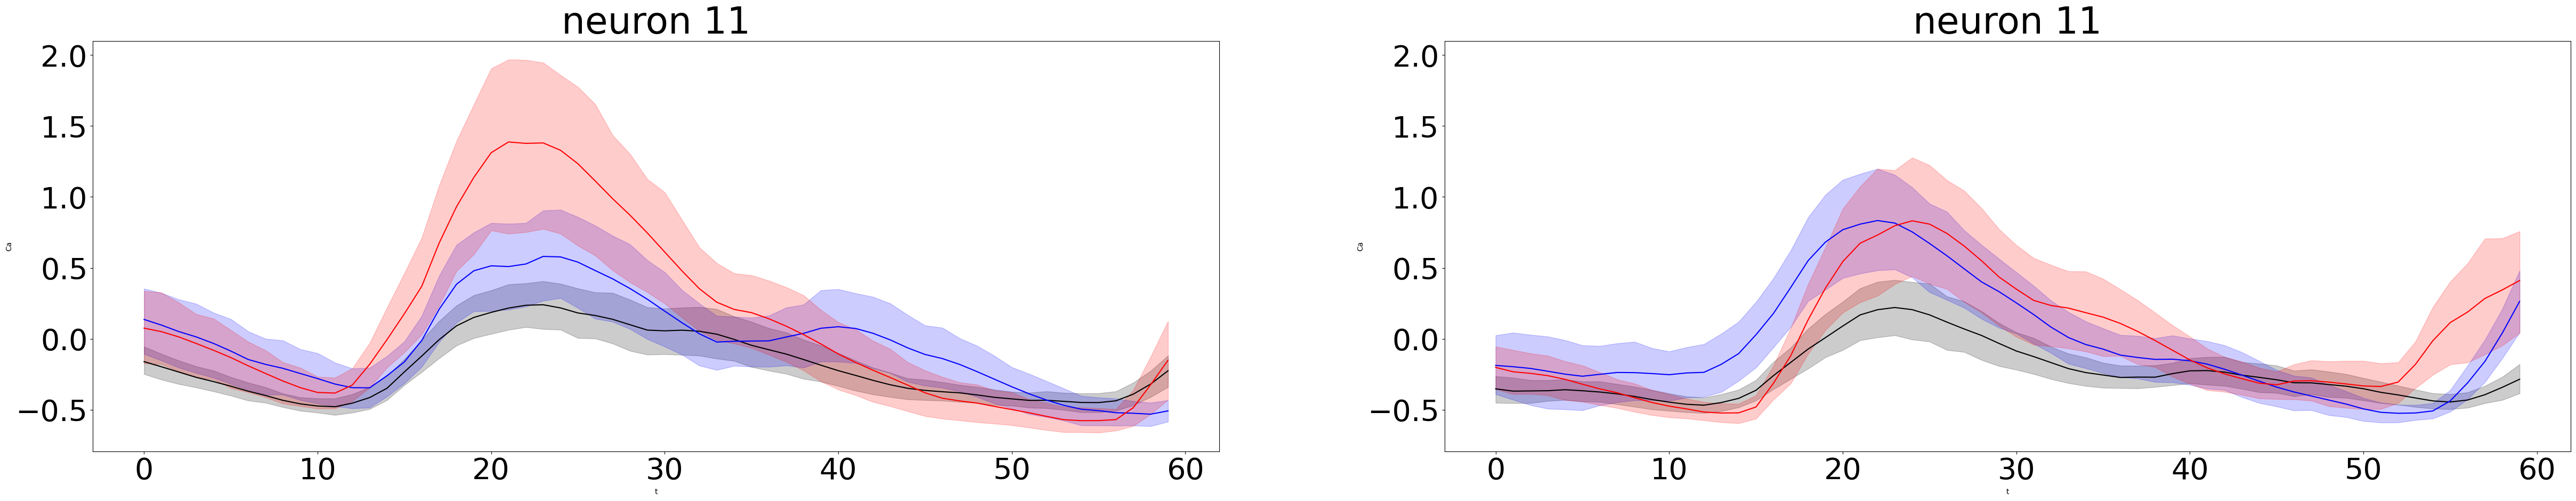

<Figure size 640x480 with 0 Axes>

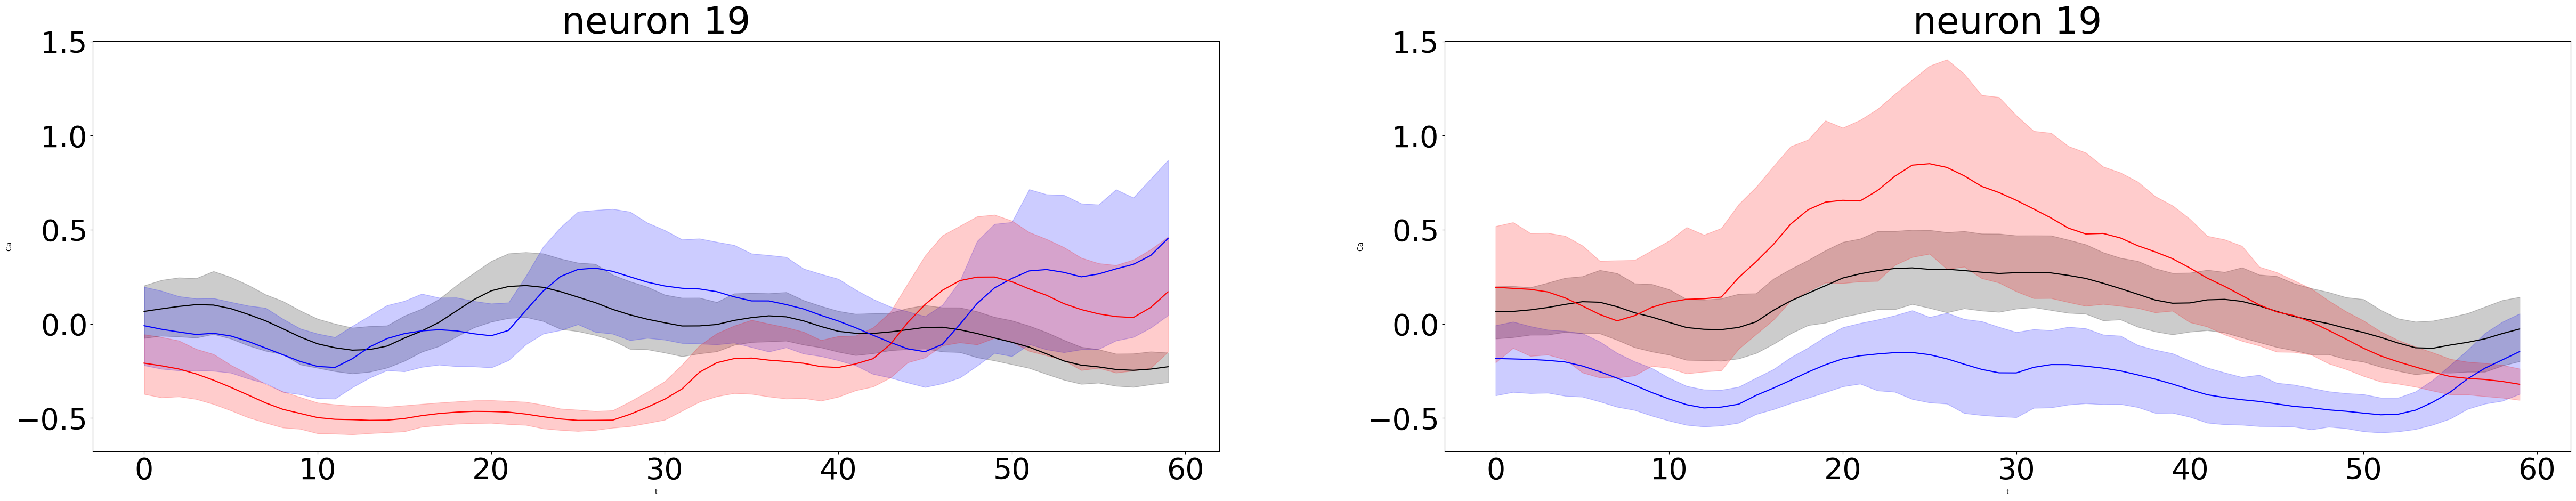

<Figure size 640x480 with 0 Axes>

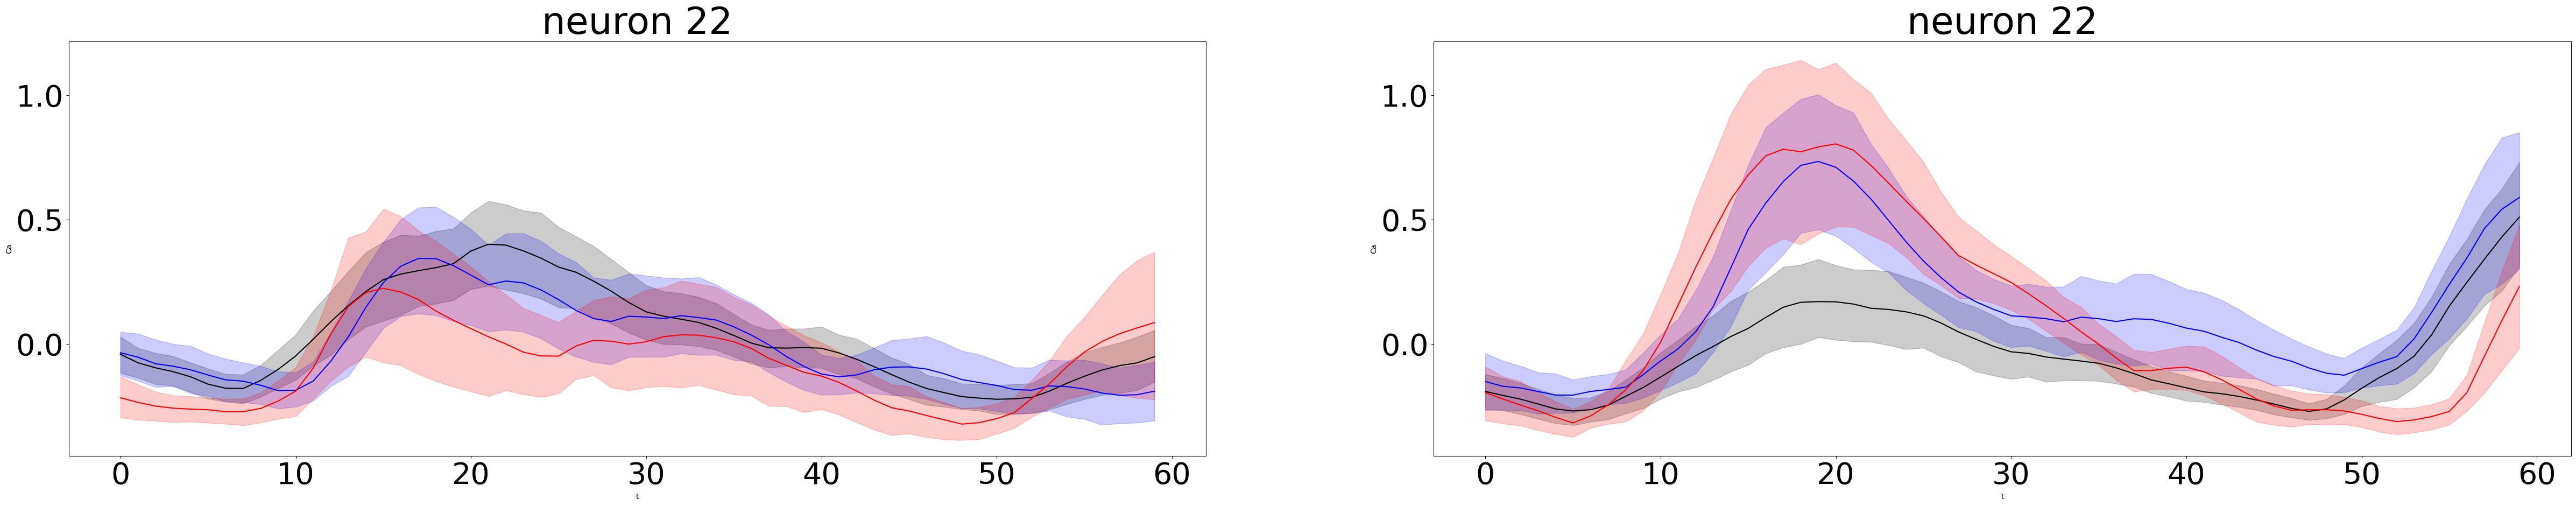

<Figure size 640x480 with 0 Axes>

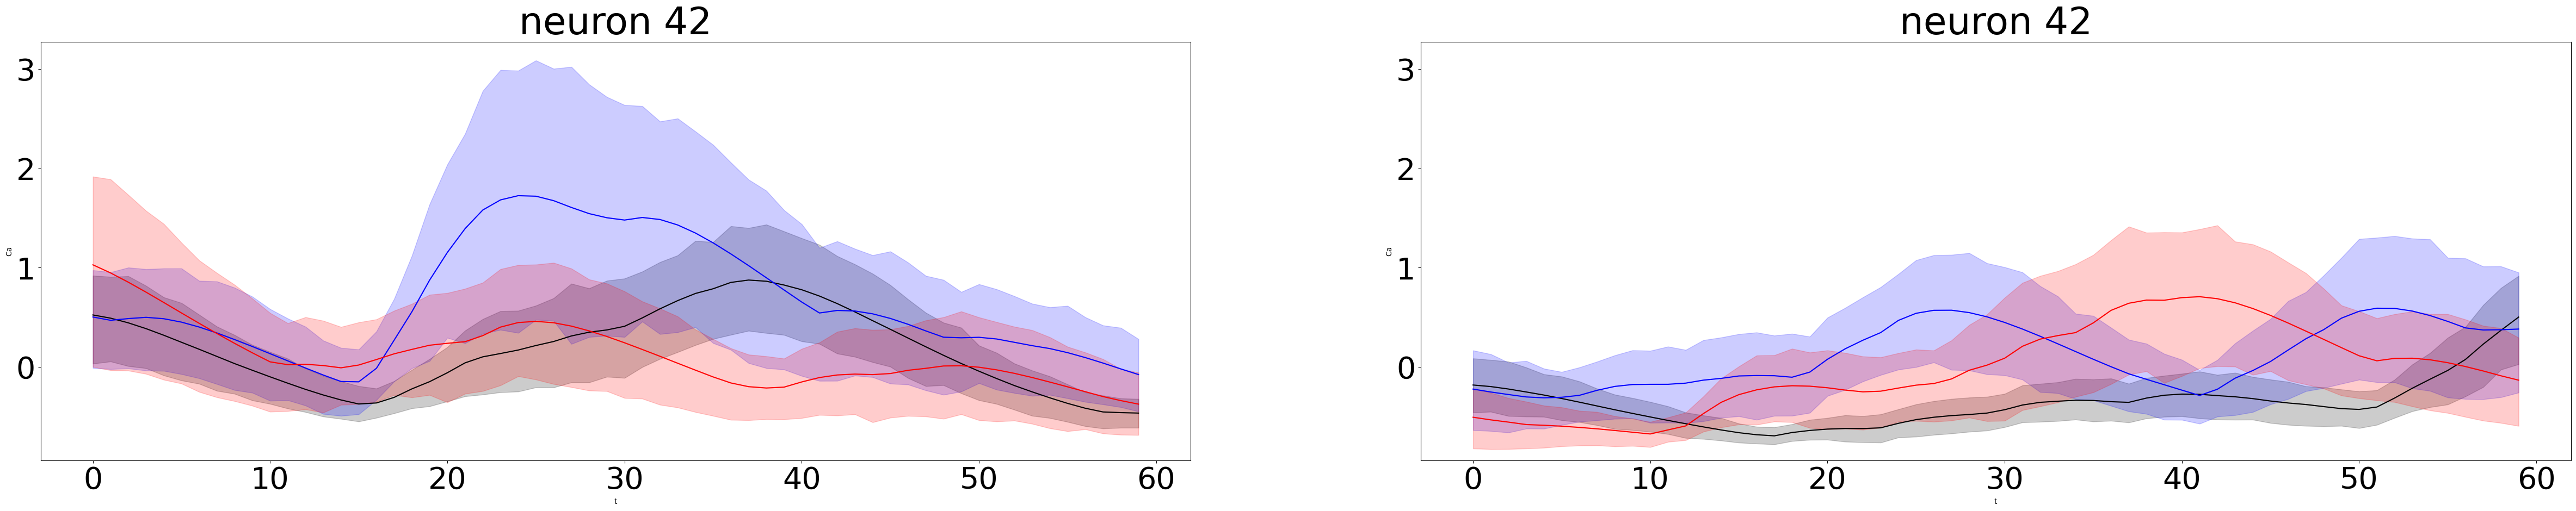

<Figure size 640x480 with 0 Axes>

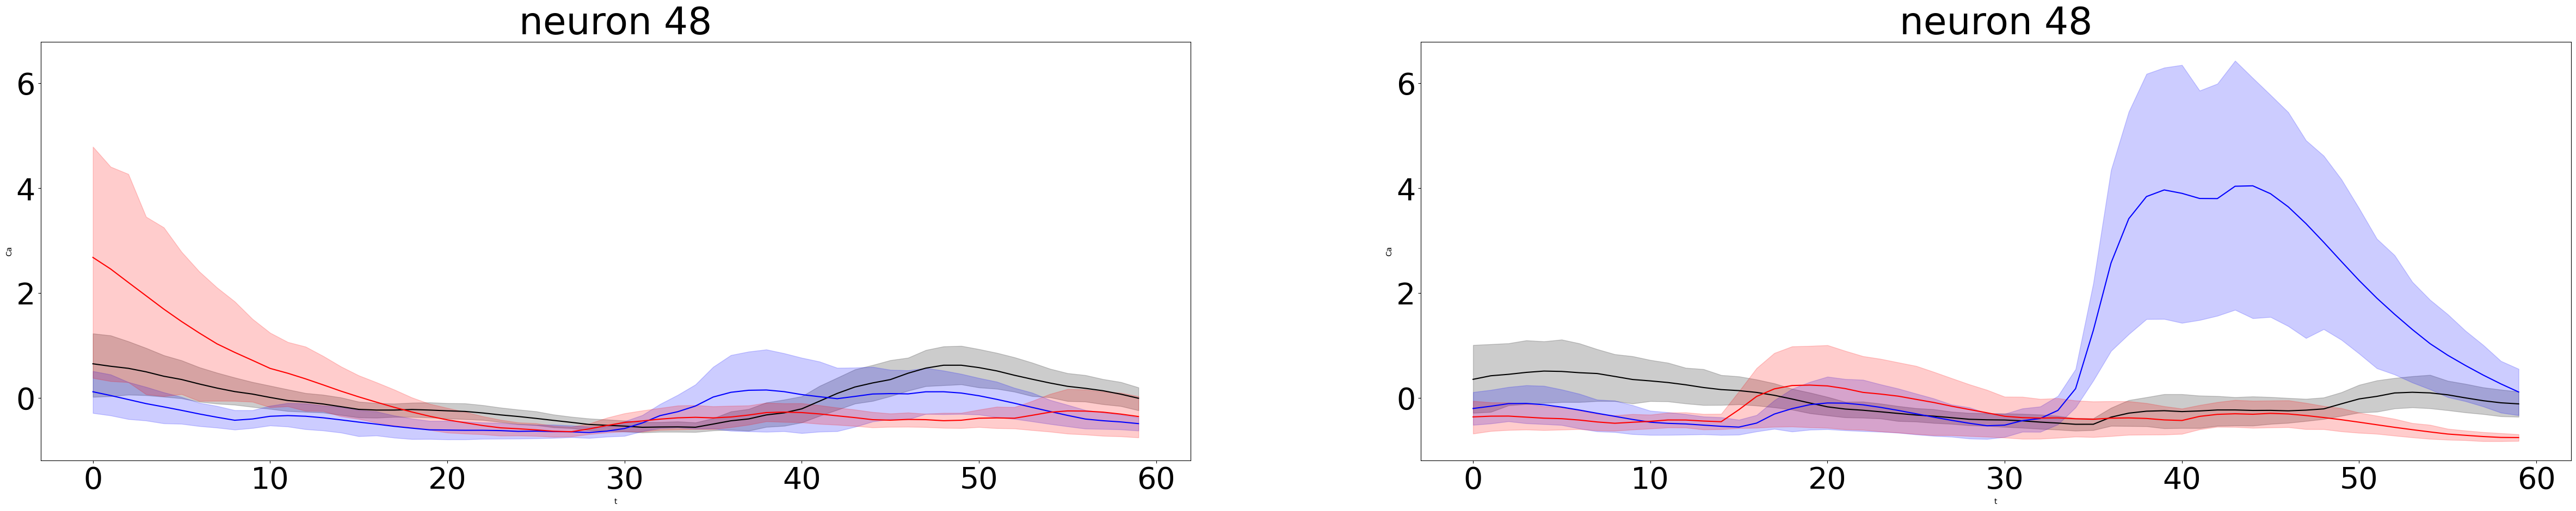

<Figure size 640x480 with 0 Axes>

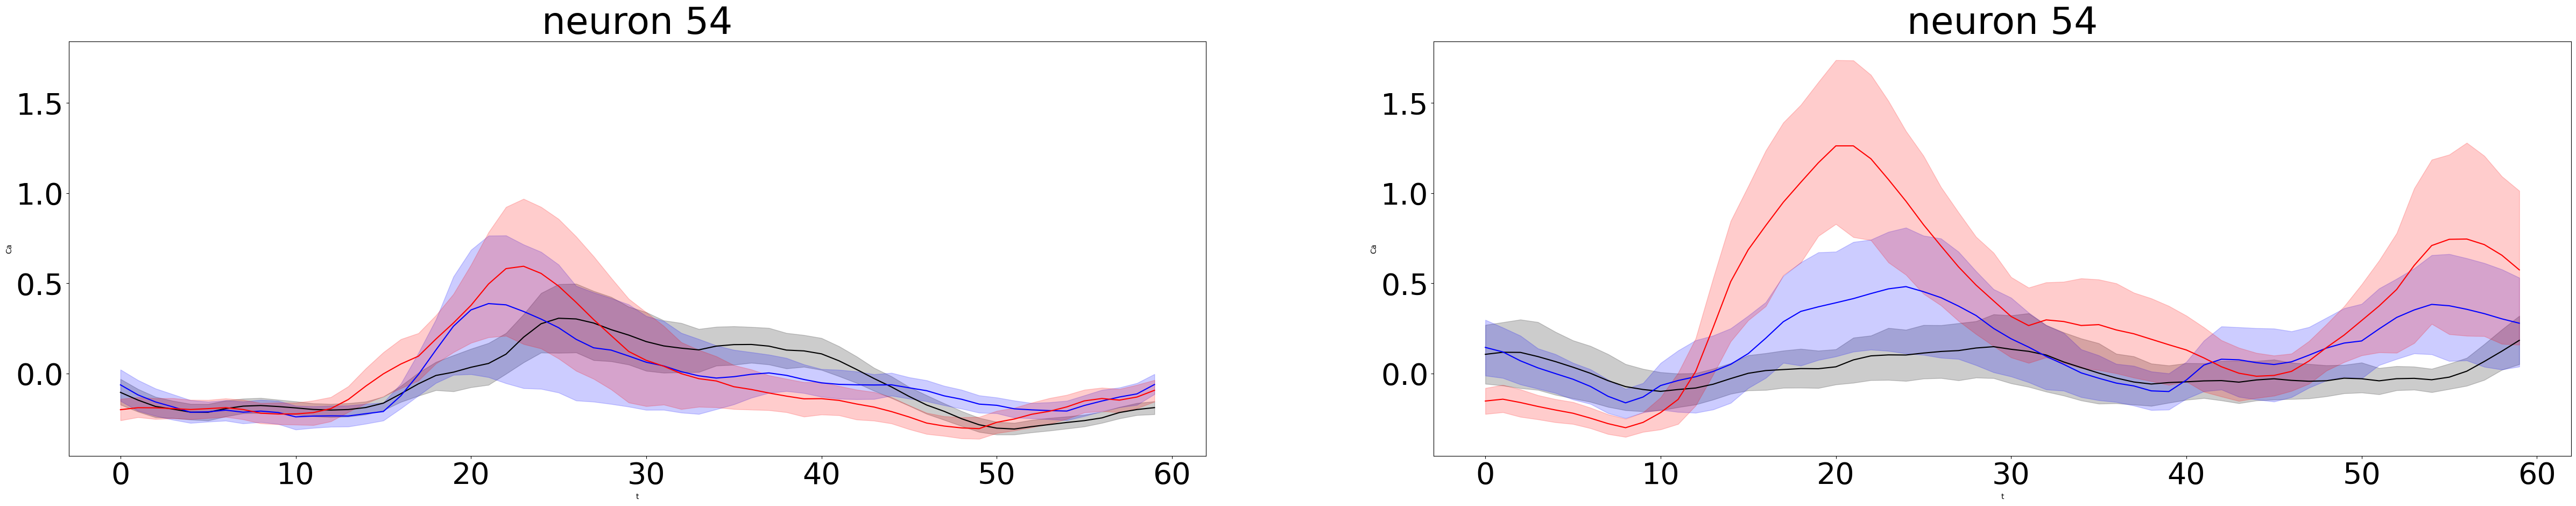

<Figure size 640x480 with 0 Axes>

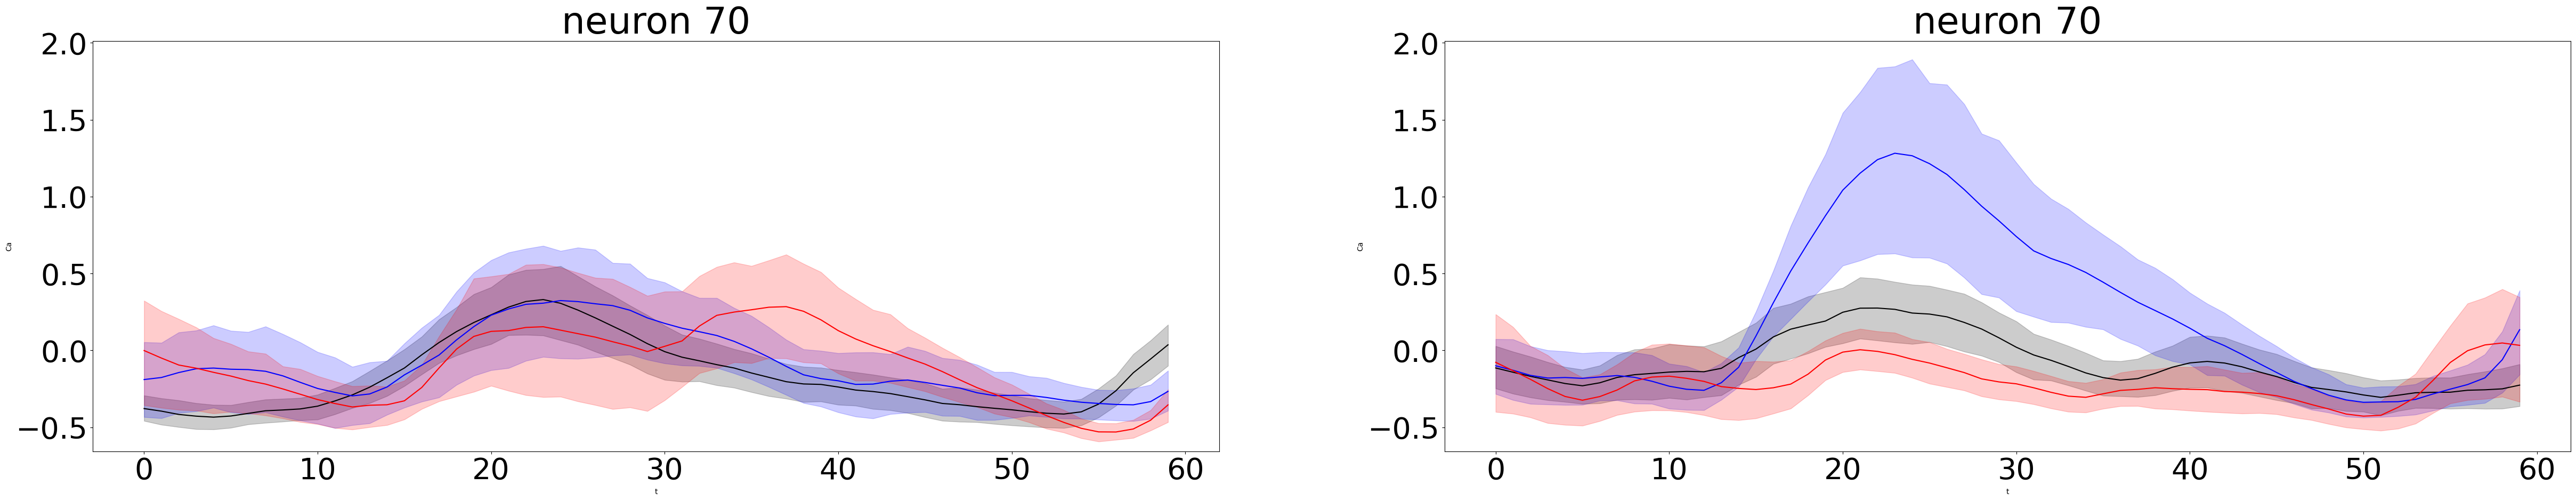

<Figure size 640x480 with 0 Axes>

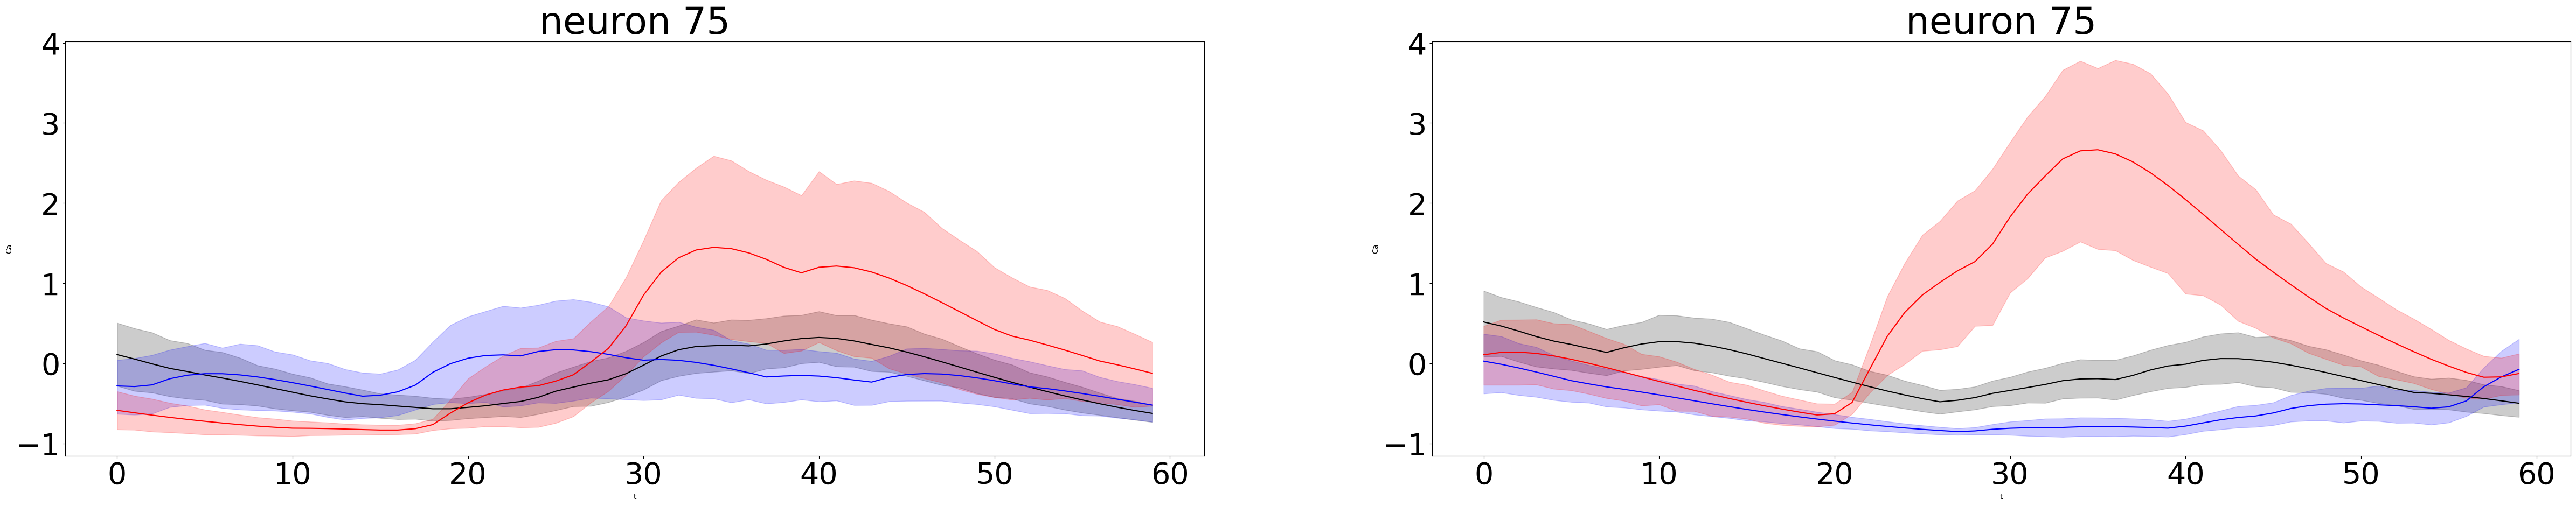

<Figure size 640x480 with 0 Axes>

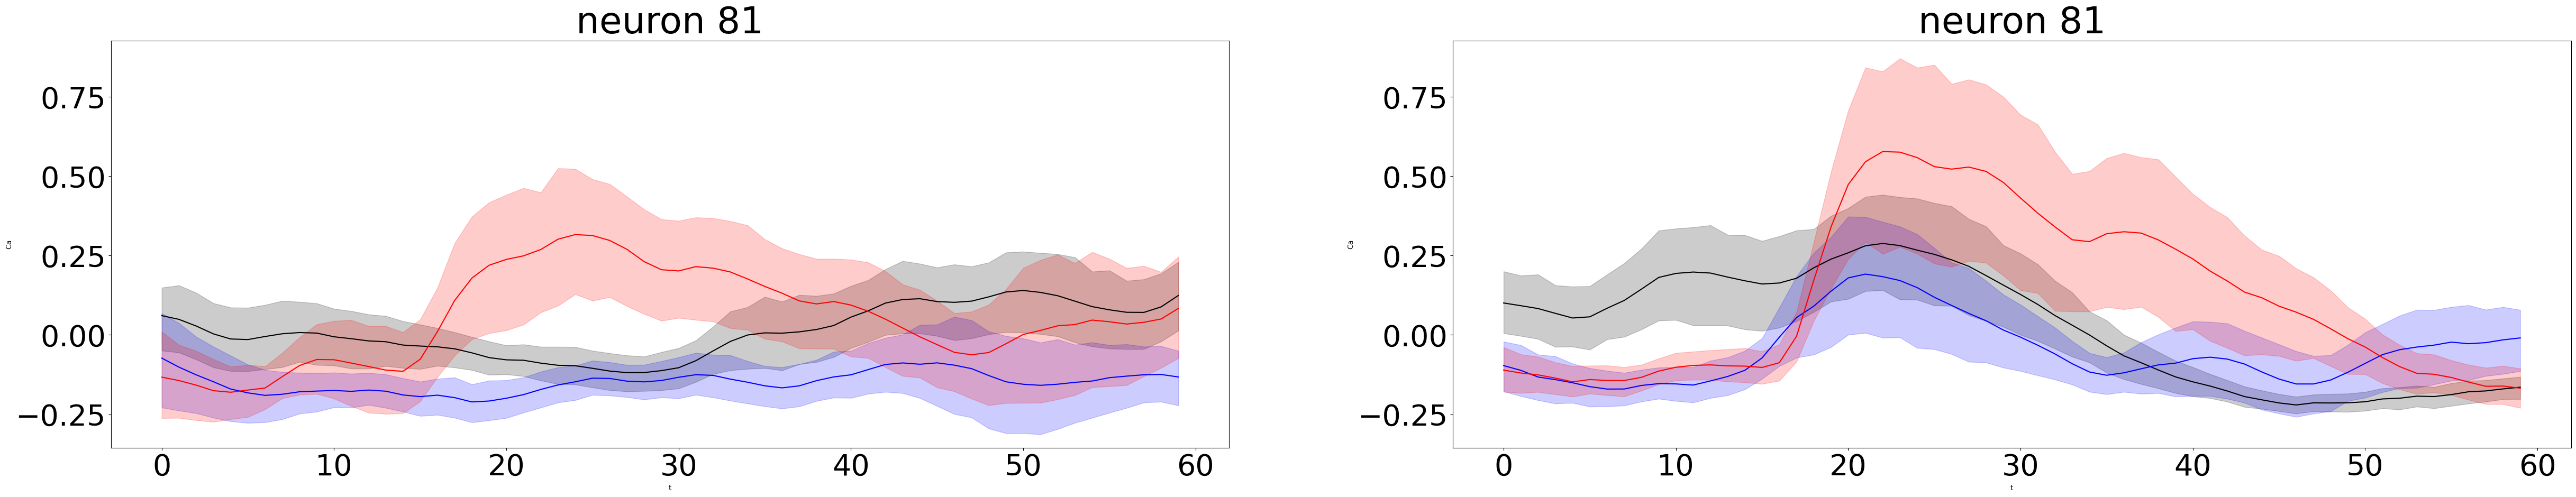

<Figure size 640x480 with 0 Axes>

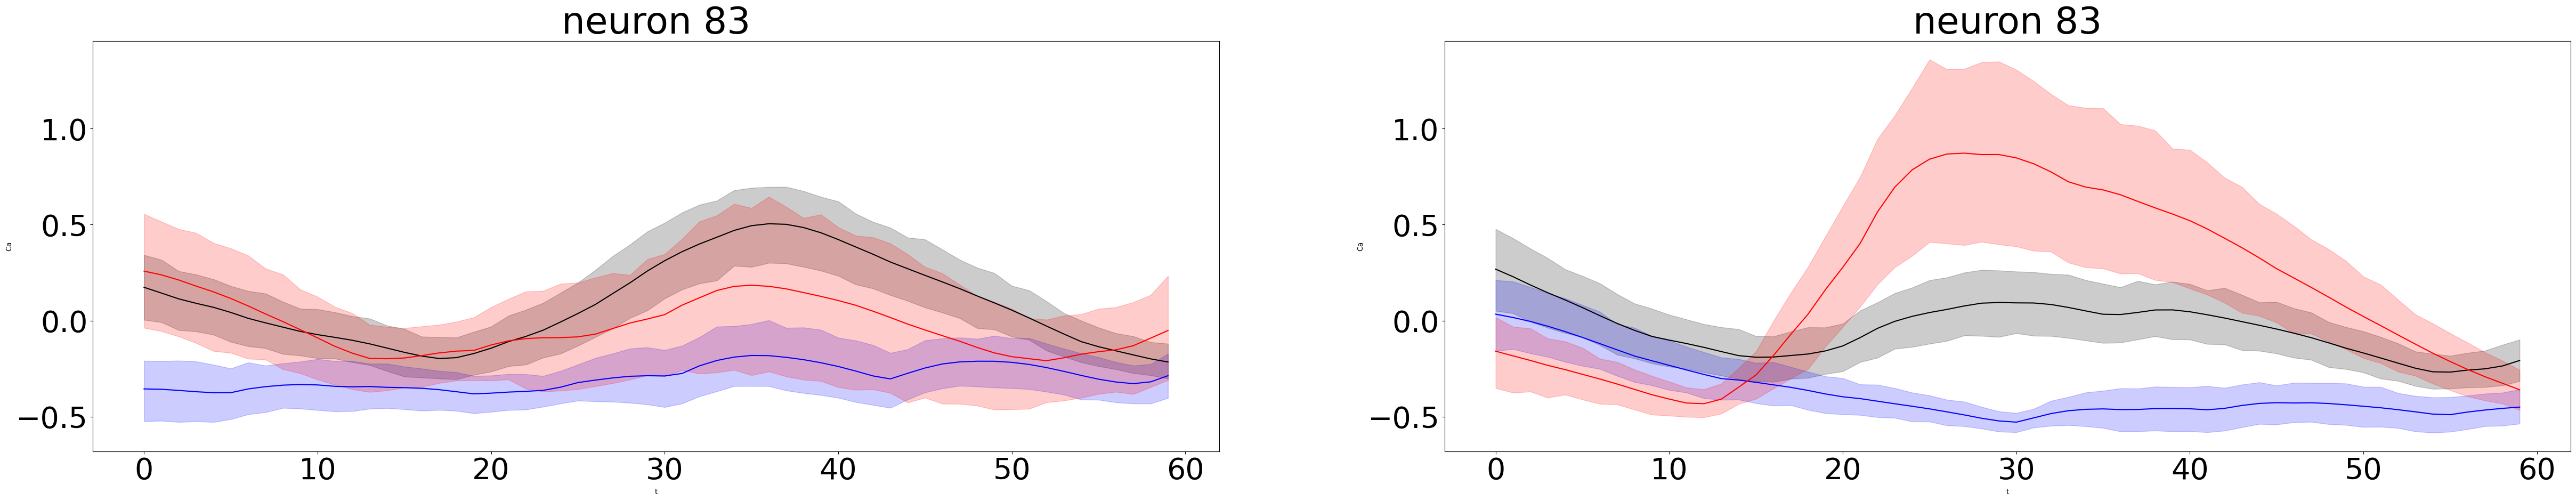

<Figure size 640x480 with 0 Axes>

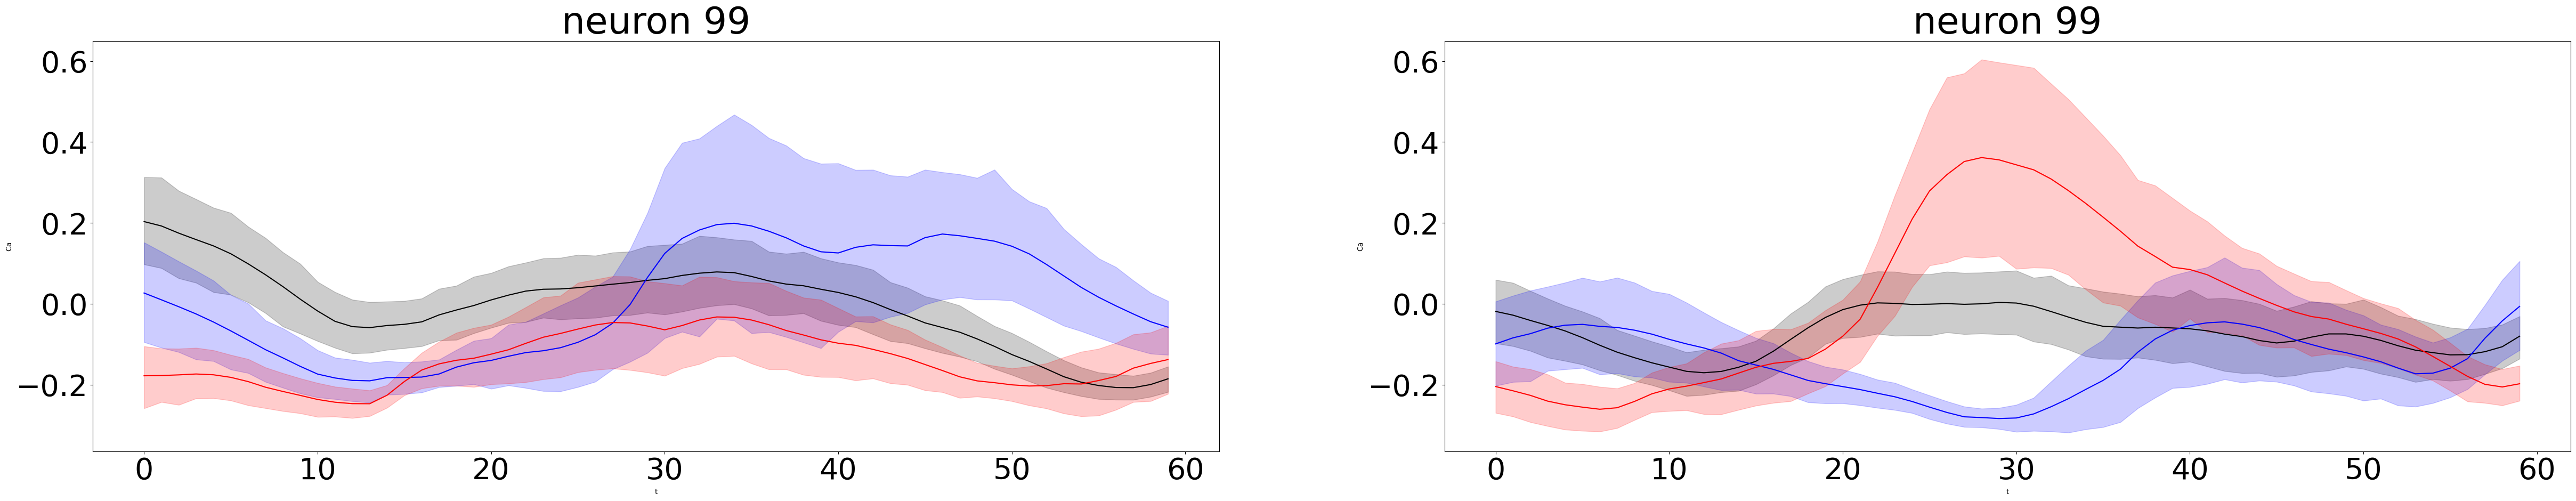

<Figure size 640x480 with 0 Axes>

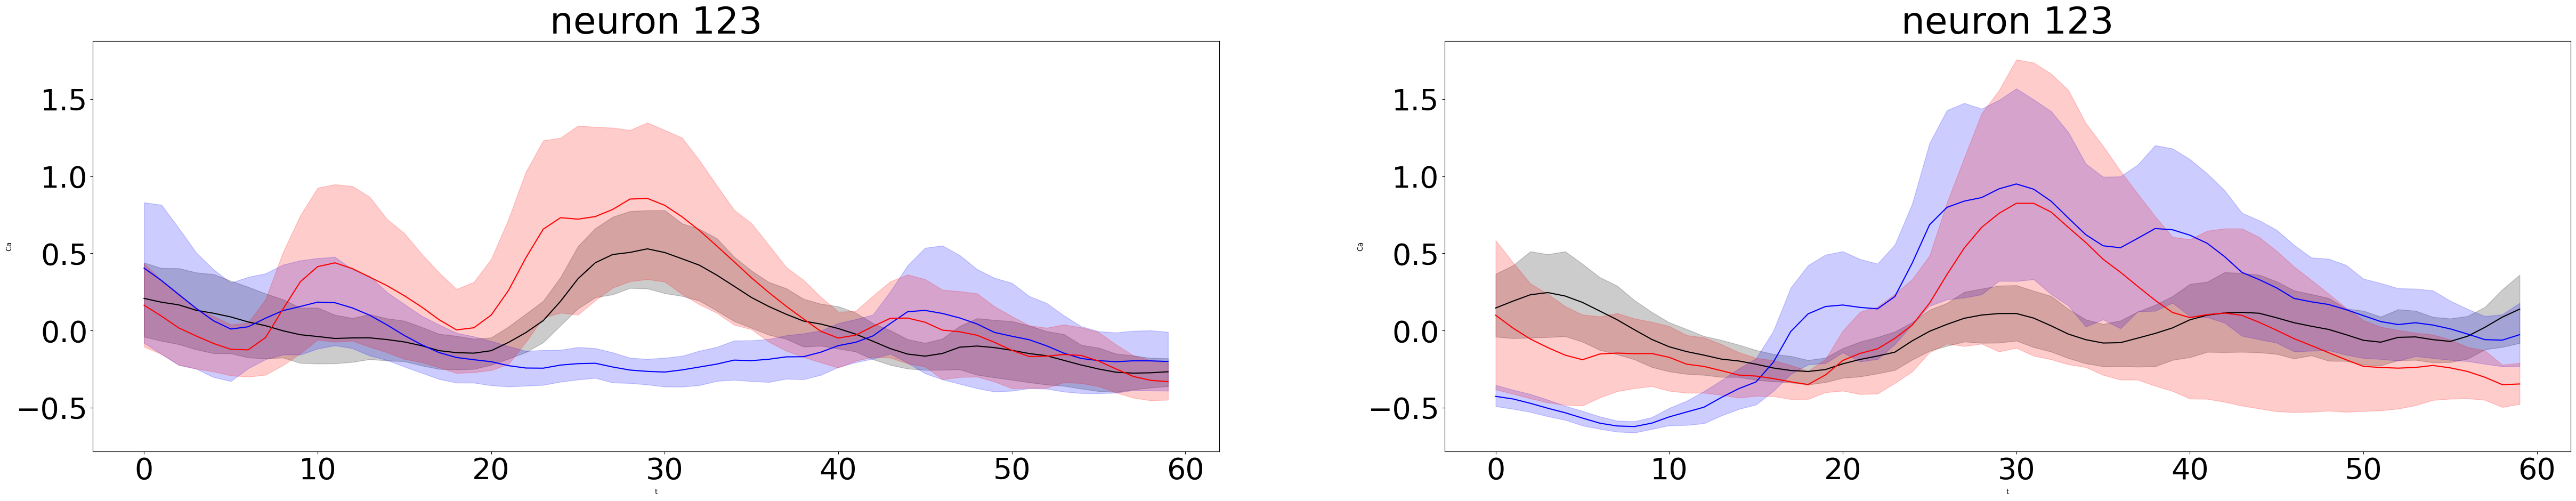

<Figure size 640x480 with 0 Axes>

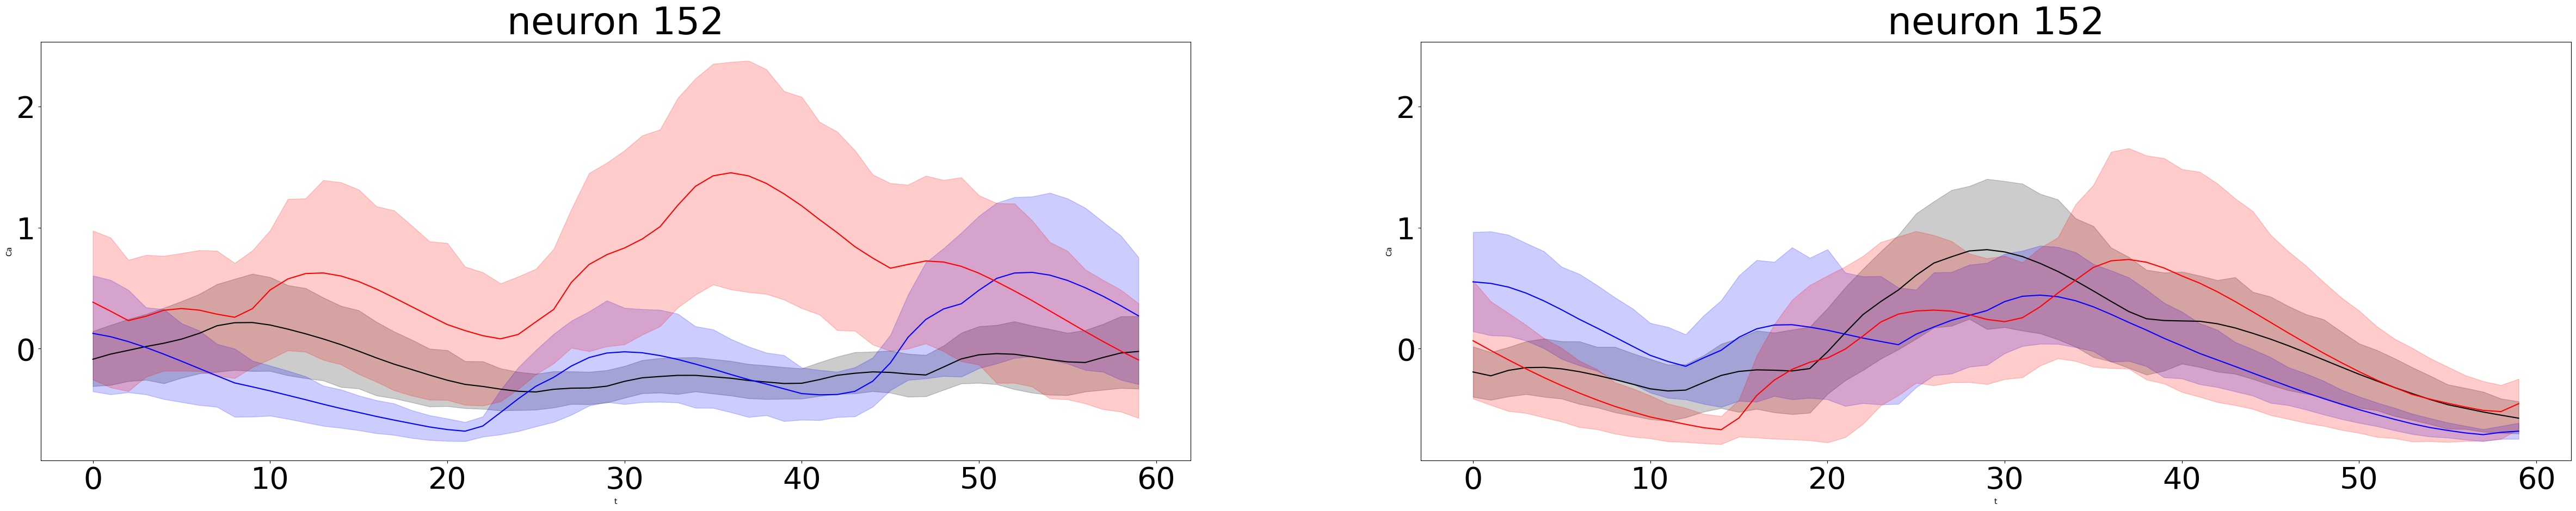

In [31]:
neu_n = len(select_neu)

for neu in np.arange(neu_n):
    # Prep the figure parameters
    plt.figure()
    subplot_cols = 2
    fig, axs = plt.subplots(1, subplot_cols, figsize=(60, 10))
    
    ########################
    ## All side L 1 col
    # No laser
    # extract data for the current neuron and shape it for plotting
    sL_l0_segm_neu = pd.DataFrame(sL_l0_segm[:, neu, :])
    sL_l0_segm_neu['trial_n']=np.arange(sL_l0_segm_neu.shape[0])
    sL_l0_segm_neu = pd.melt(sL_l0_segm_neu, id_vars='trial_n', var_name='t', value_name='Ca')
    # plot with errorbar
    sns.lineplot(data=sL_l0_segm_neu, x='t', y='Ca', errorbar=('ci', 65), ax = axs[0], color = 'black')
    
    
    # Left laser
    # extract data for the current neuron and shape it for plotting
    sL_lL_segm_neu = pd.DataFrame(sL_lL_segm[:, neu, :])
    sL_lL_segm_neu['trial_n']=np.arange(sL_lL_segm_neu.shape[0])
    sL_lL_segm_neu = pd.melt(sL_lL_segm_neu, id_vars='trial_n', var_name='t', value_name='Ca')
    # plot with errorbar
    sns.lineplot(data=sL_lL_segm_neu, x='t', y='Ca', errorbar=('ci', 65), ax = axs[0], color = 'blue')
    
    # Right laser
    sL_lR_segm_neu = pd.DataFrame(sL_lR_segm[:, neu, :])
    sL_lR_segm_neu['trial_n']=np.arange(sL_lR_segm_neu.shape[0])
    sL_lR_segm_neu = pd.melt(sL_lR_segm_neu, id_vars='trial_n', var_name='t', value_name='Ca')
    # plot with errorbar
    sns.lineplot(data=sL_lR_segm_neu, x='t', y='Ca', errorbar=('ci', 65), ax = axs[0], color = 'red')
    
    
    axs[0].set_title('neuron ' + str(select_neu[neu]), fontsize=50)
    axs[0].tick_params(axis='both', which='both', labelsize=40)
    
    
    
    ## All side R 1 col
    # No laser
    # extract data for the current neuron and shape it for plotting
    sR_l0_segm_neu = pd.DataFrame(sR_l0_segm[:, neu, :])
    sR_l0_segm_neu['trial_n']=np.arange(sR_l0_segm_neu.shape[0])
    sR_l0_segm_neu = pd.melt(sR_l0_segm_neu, id_vars='trial_n', var_name='t', value_name='Ca')
    # plot with errorbar
    sns.lineplot(data=sR_l0_segm_neu, x='t', y='Ca', errorbar=('ci', 65), ax = axs[1], color = 'black')
    
    
    # Left laser
    # extract data for the current neuron and shape it for plotting
    sR_lL_segm_neu = pd.DataFrame(sR_lL_segm[:, neu, :])
    sR_lL_segm_neu['trial_n']=np.arange(sR_lL_segm_neu.shape[0])
    sR_lL_segm_neu = pd.melt(sR_lL_segm_neu, id_vars='trial_n', var_name='t', value_name='Ca')
    # plot with errorbar
    sns.lineplot(data=sR_lL_segm_neu, x='t', y='Ca', errorbar=('ci', 65), ax = axs[1], color = 'blue')
    
    # Right laser
    sR_lR_segm_neu = pd.DataFrame(sR_lR_segm[:, neu, :])
    sR_lR_segm_neu['trial_n']=np.arange(sR_lR_segm_neu.shape[0])
    sR_lR_segm_neu = pd.melt(sR_lR_segm_neu, id_vars='trial_n', var_name='t', value_name='Ca')
    # plot with errorbar
    sns.lineplot(data=sR_lR_segm_neu, x='t', y='Ca', errorbar=('ci', 65), ax = axs[1], color = 'red')
    
    
    axs[1].set_title('neuron ' + str(select_neu[neu]), fontsize=50)
    axs[1].tick_params(axis='both', which='both', labelsize=40)
    
    y_lim0 = axs[0].get_ylim()
    y_lim1 = axs[1].get_ylim()
    
    
    y_min = min(y_lim0[0], y_lim1[0])
    y_max = max(y_lim0[1], y_lim1[1])
    
    axs[0].set_ylim(y_min, y_max)
    axs[1].set_ylim(y_min, y_max)     



    # Show the plot
    plt.show()

# all

## Plot means with confidence intervals for all neurons